In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Get LATEST driver version for 91.0.4472
Trying to download new driver from https://chromedriver.storage.googleapis.com/91.0.4472.19/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Qurram zaheer\.wdm\drivers\chromedriver\win32\91.0.4472.19]


In [3]:
url = "https://yocket.in/applications-admits-rejects/305-university-of-texas-dallas/2?page=2"
driver.get(url)
main_page = driver.current_window_handle

In [4]:
driver.find_element_by_class_name('form-control').send_keys("dongdaddy43@gmail.com")
driver.find_element_by_class_name('form-control').send_keys(Keys.ENTER)

In [5]:
driver.find_element_by_class_name('form-control-emphasized').send_keys('Imayungnigga1')


In [6]:
driver.find_element_by_class_name('form-control-emphasized').send_keys(Keys.ENTER)

In [58]:
utd=[]
url = "https://yocket.in/applications-admits-rejects/305-university-of-texas-dallas/2?page=1".format(page_num)
driver.get(url)
html = driver.page_source


from bs4 import BeautifulSoup
import numpy as np
soup = BeautifulSoup(html, 'html.parser')
panel_bod = soup.find_all("div", class_="panel-body")
nlp = soup.find_all("i")
print(nlp[-6])
student_number = int(nlp[-6].split()[1])

if len(panel_bod) == 0:
    print('dayum')
for student_card in panel_bod:
    raw_line = student_card.get_text()
    line = raw_line.replace("\n","")
    line = line[line.find("Computer Science") + 16:].split()
    term = line[0][0] + line[1]
    status = line[2]
    profile = line[3:]
    try:
        gre = int(profile[0][3:])
    except:
        gre = np.nan
    if profile[1][0] == 'T':
        try:
            english = float(profile[1][5:]) + 1*1000
        except:
            english = np.nan
    elif profile[1][0] == 'I':
        try:
            english = float(profile[1][5:]) + 2*1000
        except:
            english=np.nan
    else:
        english = np.nan

    try:
        gpa = float(profile[2][9:])
    except:
        gpa = np.nan

    try:
        workexp = int(profile[5][2])
    except:
        workexp = np.nan
    utd.append([term, status, gre, english, gpa, workexp])

<i>Showing 762 student profiles.</i>


TypeError: 'NoneType' object is not callable

In [75]:
len(utd)

201

In [76]:
uic = utd

In [7]:
urls = ["https://yocket.in/applications-admits-rejects/305-university-of-illinois-at-chicago/2?page=1",
"https://yocket.in/applications-admits-rejects/73418-new-york-university/2?page=1", 
"https://yocket.in/applications-admits-rejects/135-northeastern-university-boston/2?page=1","https://yocket.in/applications-admits-rejects/195-university-of-texas-dallas/2?page=1","https://yocket.in/applications-admits-rejects/124-state-university-of-new-york-at-buffalo/2?page=1",
"https://yocket.in/applications-admits-rejects/360-university-of-north-carolina-at-charlotte/2?page=1",
"https://yocket.in/applications-admits-rejects/71491-concordia-university-montreal/2?page=1",]


In [19]:
admits_data = []
rejects_data = []
it_idx = 0
for url in urls:
    if it_idx > 0:
        time.sleep(random.randint(50,120))
    it_idx+=1
    temp_admit = []
    temp_reject = []
    for page_num in range(1,11):
        admit_url = url[:-1] + str(page_num)
       
        driver.get(admit_url)
        html = driver.page_source
        with codecs.open('{}.html'.format(order[it_idx] + 'admit'), 'w', 'utf-8-sig')  as f:
            f.write(html)

        from bs4 import BeautifulSoup
        import numpy as np
        soup = BeautifulSoup(html, 'html.parser')
        panel_bod = soup.find_all("div", class_="panel-body")
        nlp = soup.find_all("i")
        print(nlp[-6])
        try:
            student_number = int(nlp[-6].get_text().split()[1])
        except: 
            continue
        if page_num*20 > student_number:
            continue
        if len(panel_bod) == 0:
            print('dayum')
        for student_card in panel_bod:
            raw_line = student_card.get_text()
            line1 = raw_line.replace("\n","")
            if line1.find("Fall") == -1:
                line = line1[line1.find("Spring"):].split()
            else:
                line = line1[line1.find("Fall"):].split()
            try:
                term = line[0][0] + line[1]
            except:
                term=[]
            try:
                status = line[2]
            except:
                status=''
            try:
                profile = line[3:]
                if profile[1][0] == 'T':
                    try:
                        english = float(profile[1][5:]) + 1*1000
                    except:
                        english = np.nan
                elif profile[1][0] == 'I':
                    try:
                        english = float(profile[1][5:]) + 2*1000
                    except:
                        english=np.nan
                else:
                    english = np.nan
            except:
                profile=[]
            try:
                gre = int(profile[0][3:])
            except:
                gre = np.nan
            

            try:
                gpa = float(profile[2][9:])
            except:
                gpa = np.nan

            try:
                workexp = int(profile[5][2:])
            except:
                workexp = np.nan
            temp_admit.append([term, status, gre, english, gpa, workexp])
            print([term, status, gre, english, gpa, workexp])
            

    time.sleep(random.randint(50,120))
    for page_num in range(1,11):
        reject_url = url[:-8] +'3?page=' + str(page_num)
       
        driver.get(reject_url)
        html = driver.page_source
        with codecs.open('{}.html'.format(order[it_idx] + 'reject'), 'w', 'utf-8-sig')  as f:
            f.write(html)

        from bs4 import BeautifulSoup
        import numpy as np
        soup = BeautifulSoup(html, 'html.parser')
        panel_bod = soup.find_all("div", class_="panel-body")
        nlp = soup.find_all("i")
        print(nlp[-6])
        try:
            student_number = int(nlp[-6].get_text().split()[1])
        except: 
            continue
        if page_num*20 > student_number:
            continue
        if len(panel_bod) == 0:
            print('dayum')
        for student_card in panel_bod:
            raw_line = student_card.get_text()
            line1 = raw_line.replace("\n","")
            if line1.find("Fall") == -1:
                line = line1[line1.find("Spring"):].split()
            else:
                line = line1[line1.find("Fall"):].split()
            try:
                term = line[0][0] + line[1]
            except:
                term=[]
            try:
                status = line[2]
            except:
                status=''
            try:
                profile = line[3:]
                if profile[1][0] == 'T':
                    try:
                        english = float(profile[1][5:]) + 1*1000
                    except:
                        english = np.nan
                elif profile[1][0] == 'I':
                    try:
                        english = float(profile[1][5:]) + 2*1000
                    except:
                        english=np.nan
                else:
                    english = np.nan
            except:
                profile=[]
            try:
                gre = int(profile[0][3:])
            except:
                gre = np.nan
            

            try:
                gpa = float(profile[2][9:])
            except:
                gpa = np.nan

            try:
                workexp = int(profile[5][2:])
            except:
                workexp = np.nan
            temp_reject.append([term, status, gre, english, gpa, workexp])
            print([term, status, gre, english, gpa, workexp])
    admits_data.append(temp_admit)
    rejects_data.append(temp_reject)

<i>Showing 762 student profiles.</i>
['F2021', 'Admit', 309, 1097.0, 8.29, 2]
['F2021', 'Admit', 304, 2006.0, 7.2, nan]
['F2021', 'Admit', 299, 2006.5, 7.71, 43]
['F2021', 'Admit', 330, 2008.0, 7.8, 12]
[[], '', nan, 2008.0, nan, nan]
['F2021', 'Admit', 310, 1106.0, 9.3, 1]
['F2020', 'Admit', 316, 1095.0, 8.08, 10]
['F2021', 'Admit', 315, 1094.0, 8.4, 4]
['F2021', 'Admit', 321, nan, nan, nan]
['F2021', 'Admit', 319, 2006.5, 7.56, 22]
['F2021', 'Admit', 321, 1105.0, 8.5, nan]
['F2021', 'Admit', 318, 2007.0, 8.5, 1]
['F2020', 'Admit', 315, 1111.0, 8.75, 24]
['F2021', 'Admit', 295, 1108.0, 8.91, nan]
['F2021', 'Admit', 319, 2007.5, 8.25, 11]
['F2021', 'Admit', nan, 2007.0, 9.74, 6]
['F2021', 'Admit', 315, 2007.0, 8.01, nan]
['F2021', 'Admit', 317, 1102.0, 9.27, 27]
['F2021', 'Admit', 308, 1090.0, 8.63, nan]
['F2021', 'Admit', 312, 1111.0, 8.48, 6]
['F2021', 'Admit', 327, 1113.0, 74.0, 76]
<i>Showing 762 student profiles.</i>
['F2021', 'Admit', 321, 1114.0, 9.44, 9]
['F2021', 'Admit', 326,

IndexError: list index out of range

In [18]:
import time
import random
import math
math.ceil(3.1)
from bs4 import BeautifulSoup
import codecs

In [60]:
nlp[-6]

<i>Showing 762 student profiles.</i>

In [34]:
nlp[-6].get_text().split()[1]

'762'

In [39]:
admits_data[0][0]

['F2021', 'Admit', 309, 1097.0, 8.29, 2]

In [156]:
my_data = [330, 117, 8.22, 4]

In [20]:
import pandas as pd

In [21]:
admits = pd.DataFrame(admits_data)
rejects = pd.DataFrame(rejects_data)

In [70]:
admits.to_csv('admits.csv')
rejects.to_csv('rejects.csv')

In [74]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(admits.iloc[0,:].to_frame(), figsize=(15,10))

ValueError: Number of columns must be a positive integer, not 0

In [72]:
admits.shape

(7, 201)

In [75]:
admits.columns

RangeIndex(start=0, stop=201, step=1)

In [22]:

admits.iloc[0]

0        [F2021, Admit, 309, 1097.0, 8.29, 2]
1       [F2021, Admit, 304, 2006.0, 7.2, nan]
2       [F2021, Admit, 299, 2006.5, 7.71, 43]
3        [F2021, Admit, 330, 2008.0, 7.8, 12]
4               [[], , nan, 2008.0, nan, nan]
                        ...                  
196    [F2020, Admit, 323, 1111.0, 7.64, nan]
197      [F2020, Admit, 322, 1104.0, 6.2, 21]
198     [F2020, Admit, 313, 1111.0, 70.0, 26]
199       [F2022, Admit, 315, 1115.0, 8.5, 4]
200       [F2020, Admit, 324, 1112.0, 7.1, 7]
Name: 0, Length: 201, dtype: object

In [23]:
big_dfarr = []

for index, row in admits.iterrows():
    pdarr = []
    i=0
    for item in row:
        pdarr.append([])
        print(index, i)
        try:
            for i2 in item:
                pdarr[i].append(i2)

        except:
            pdarr[i].append(np.nan)
        i+=1
    pdarr = pd.DataFrame(pdarr)
    big_dfarr.append(pdarr)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [24]:
big_dfarr[0]

,0,1,2,3,4,5
0,F2021,Admit,309.0,1097.0,8.29,2.0
1,F2021,Admit,304.0,2006.0,7.20,NaN
2,F2021,Admit,299.0,2006.5,7.71,43.0
3,F2021,Admit,330.0,2008.0,7.80,12.0
4,[],,NaN,2008.0,NaN,NaN
...,...,...,...,...,...,...
196,F2020,Admit,323.0,1111.0,7.64,NaN
197,F2020,Admit,322.0,1104.0,6.20,21.0
198,F2020,Admit,313.0,1111.0,70.00,26.0
199,F2022,Admit,315.0,1115.0,8.50,4.0


In [25]:
colums = ['Window', 'Status', 'GRE', 'TOEFL', 'IELTS', 'GPA', 'Work Experience']

In [26]:
big_dfarr2 = []

for index, row in rejects.iterrows():
    pdarr = []
    i=0
    for item in row:
        pdarr.append([])
        print(index, i)
        try:
            for i2 in item:
                pdarr[i].append(i2)

        except:
            pdarr[i].append(np.nan)
        i+=1
    pdarr = pd.DataFrame(pdarr)
    big_dfarr2.append(pdarr)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [27]:
big_dfarr2[0]

,0,1,2,3,4,5
0,F2021,Reject,318.0,1094.0,8.00,NaN
1,F2021,Reject,312.0,1081.0,7.88,2.0
2,F2021,Reject,295.0,1092.0,7.67,NaN
3,F2021,Reject,302.0,2007.0,85.33,48.0
4,[],,NaN,2007.0,NaN,NaN
...,...,...,...,...,...,...
196,F2019,Reject,316.0,1114.0,68.90,31.0
197,F2019,Reject,312.0,1108.0,8.32,2.0
198,F2019,Reject,315.0,1107.0,66.00,36.0
199,F2019,Reject,311.0,1104.0,7.75,21.0


In [112]:
tbf = big_dfarr2.copy()

In [117]:
t1 = tbf[0]

In [119]:
t1 = t1[t1[4]>10]

In [122]:
t1 = tbf[0]

In [123]:
t1

,0,1,2,3,4,5
0,F2021,Reject,318.0,1094.0,8.00,NaN
1,F2021,Reject,312.0,1081.0,7.88,2.0
2,F2021,Reject,295.0,1092.0,7.67,NaN
3,F2021,Reject,302.0,2007.0,85.33,4.0
4,[],,NaN,2007.0,NaN,NaN
...,...,...,...,...,...,...
196,F2019,Reject,316.0,1114.0,68.90,3.0
197,F2019,Reject,312.0,1108.0,8.32,2.0
198,F2019,Reject,315.0,1107.0,66.00,3.0
199,F2019,Reject,311.0,1104.0,7.75,2.0


In [124]:
t1.loc[t1[4] < 10, 4] *= 9.5

In [128]:
t1['IELTS'] = t1.loc[t1[3] > 2000, 3] - 2000

In [131]:
t1['TOEFL'] = t1.loc[t1[3] < 2000, 3] - 1000

In [132]:
t1

,0,1,2,3,4,5,IELTS,TOEFL
0,F2021,Reject,318.0,1094.0,76.000,NaN,NaN,94.0
1,F2021,Reject,312.0,1081.0,74.860,2.0,NaN,81.0
2,F2021,Reject,295.0,1092.0,72.865,NaN,NaN,92.0
3,F2021,Reject,302.0,2007.0,85.330,4.0,7.0,NaN
4,[],,NaN,2007.0,NaN,NaN,7.0,NaN
...,...,...,...,...,...,...,...,...
196,F2019,Reject,316.0,1114.0,68.900,3.0,NaN,114.0
197,F2019,Reject,312.0,1108.0,79.040,2.0,NaN,108.0
198,F2019,Reject,315.0,1107.0,66.000,3.0,NaN,107.0
199,F2019,Reject,311.0,1104.0,73.625,2.0,NaN,104.0


In [28]:
for t1 in big_dfarr:
    t1.loc[t1[4] < 10, 4] *= 9.5
    t1['TOEFL'] = t1.loc[t1[3] < 2000, 3] - 1000
    t1['IELTS'] = t1.loc[t1[3] > 2000, 3] - 2000

for t1 in big_dfarr2:
    t1.loc[t1[4] < 10, 4] *= 9.5
    t1['TOEFL'] = t1.loc[t1[3] < 2000, 3] - 1000
    t1['IELTS'] = t1.loc[t1[3] > 2000, 3] - 2000


In [29]:
big_dfarr[0]

,0,1,2,3,4,5,TOEFL,IELTS
0,F2021,Admit,309.0,1097.0,78.755,2.0,97.0,NaN
1,F2021,Admit,304.0,2006.0,68.400,NaN,NaN,6.0
2,F2021,Admit,299.0,2006.5,73.245,43.0,NaN,6.5
3,F2021,Admit,330.0,2008.0,74.100,12.0,NaN,8.0
4,[],,NaN,2008.0,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...
196,F2020,Admit,323.0,1111.0,72.580,NaN,111.0,NaN
197,F2020,Admit,322.0,1104.0,58.900,21.0,104.0,NaN
198,F2020,Admit,313.0,1111.0,70.000,26.0,111.0,NaN
199,F2022,Admit,315.0,1115.0,80.750,4.0,115.0,NaN


In [30]:
for t1 in big_dfarr:
    t1.drop([3], axis=1, inplace=True)
    t1.columns = ['Window', 'Status', 'GRE', 'GPA', 'Work Experience', 'TOEFL', 'IELTS',]
for t1 in big_dfarr2:
    t1.drop([3], axis=1, inplace=True)
    t1.columns = ['Window', 'Status', 'GRE', 'GPA', 'Work Experience', 'TOEFL', 'IELTS',]
    

In [31]:
big_dfarr[0]

,Window,Status,GRE,GPA,Work Experience,TOEFL,IELTS
0,F2021,Admit,309.0,78.755,2.0,97.0,NaN
1,F2021,Admit,304.0,68.400,NaN,NaN,6.0
2,F2021,Admit,299.0,73.245,43.0,NaN,6.5
3,F2021,Admit,330.0,74.100,12.0,NaN,8.0
4,[],,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...
196,F2020,Admit,323.0,72.580,NaN,111.0,NaN
197,F2020,Admit,322.0,58.900,21.0,104.0,NaN
198,F2020,Admit,313.0,70.000,26.0,111.0,NaN
199,F2022,Admit,315.0,80.750,4.0,115.0,NaN


In [32]:
order = ['uic', 'nyu', 'neu', 'utd', 'suny', 'uncc']

for i in range(6):
    uni_df = pd.concat([big_dfarr[i], big_dfarr2[i]])
    uni_df.to_csv('{}.csv'.format(order[i]))
    

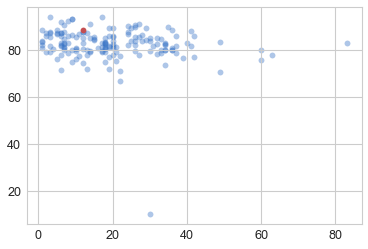

In [58]:
plt.scatter(big_dfarr[2]['Work Experience'], big_dfarr[2]['GPA'], alpha=0.4)
plt.scatter(12, 9.3*9.5, c='r')
plt.show()

(array([ 8.,  6.,  5.,  9.,  8.,  9.,  5.,  2., 10.,  4.,  4.,  5., 10.,
        14.,  3.,  3.,  4.,  2.,  6.,  5.,  2.,  5.,  3.,  3.,  7.,  4.,
         3.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.        ,  2.36666667,  3.73333333,  5.1       ,  6.46666667,
         7.83333333,  9.2       , 10.56666667, 11.93333333, 13.3       ,
        14.66666667, 16.03333333, 17.4       , 18.76666667, 20.13333333,
        21.5       , 22.86666667, 24.23333333, 25.6       , 26.96666667,
        28.33333333, 29.7       , 31.06666667, 32.43333333, 33.8       ,
        35.16666667, 36.53333333, 37.9       , 39.26666667, 40.63333333,
        42.        , 43.36666667, 44.73333333, 46.1       , 47.46666667,
        48.83333333, 50.2       , 51.56666667, 52.93333333, 54.3       ,
        55.66666667, 57.03333333, 58.4       , 59.76666667, 61.13333333,
 

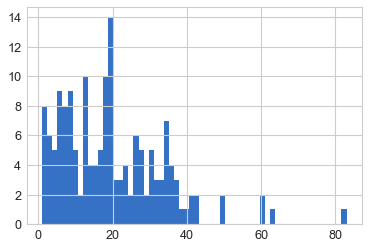

In [48]:
plt.hist(big_dfarr[2]['Work Experience'], bins=60)

In [162]:
big_dfarr[0]['GPA'].quantile(0.9)

86.45

In [161]:
big_dfarr2[0]['GPA'].quantile(0.9)

84.62600000000002

In [164]:
big_dfarr[0]['Work Experience'].quantile(0.9)

6.0

In [35]:
import matplotlib.pyplot as plt

In [37]:
my_data = [330, 117, 8.22, 4]